## Software setup

In [1]:
import sys
import glob
import os
from scipy.optimize import root_scalar

# Add skyllh and i3skyllh projects to the PYTHONPATH
sys.path.insert(0, '/data/user/liruohan/software/skyllh')
sys.path.insert(0, '/data/user/liruohan/software/i3skyllh')
#sys.path.insert(0, '/home/liruohan/.local/lib/python3.7/site-packages')
#sys.path.insert(0, '/home/cbellenghi/.pyenv/versions/3.8.1/lib/python3.8/site-packages')

# Add missing python packages from cvmfs
#sys.path.insert(0, '/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages')
extra_path = "/cvmfs/icecube.opensciencegrid.org/users/tkontrimas/software/pip/python3.11/site-packages" # whatever individual directory it is
if extra_path not in sys.path:
    sys.path.append(extra_path)

In [2]:
from skyllh.core.utils.analysis import calculate_critical_ts_from_gamma

## Create `datasets` object

In [3]:
import numpy as np

In [4]:
bkg_dir='/data/user/liruohan/LE/trials/bkg/'
bkg_trials = np.concatenate([np.load(f) for f in glob.glob(os.path.join(bkg_dir, '*.npy'))])

In [5]:
from scipy.stats import norm
#sensitivity
bkg_p_sens = 0.5
sig_p_sens = 0.9
#3 sigma dp
bkg_p_3dp = norm.sf(3,0,1)
sig_p_3dp = 0.5
# 5 sigma dp
bkg_p_5dp = norm.sf(5,0,1)
sig_p_5dp = 0.5

In [6]:
ts_critical_3dp = calculate_critical_ts_from_gamma(bkg_trials['ts'], bkg_p_3dp)
ts_critical_5dp = calculate_critical_ts_from_gamma(bkg_trials['ts'], bkg_p_5dp)

In [7]:
n_max=300
# if energy == 10000:
#     n_max = 80
# if (energy == 1000 or 100):
#     n_max = 300
number_of_signals = np.linspace(1, n_max, n_max)
sig_dir='/data/user/liruohan/LE/trials/sig/'

In [8]:
percentage_above_bkg = []
percentage_above_critical_ts_3dp = []
percentage_above_critical_ts_5dp = []
mean_ns_inj = []
for ns in number_of_signals:
    
    fpath = sig_dir+'mean_ns_inj*_mean_ns_fit{}_trials20_rss*.npy'.format(str(round(ns)))
    print(fpath)
    sig_trials = np.concatenate([np.load(f) for f in glob.glob(fpath)])
    
    mean_ns_inj.append(ns)
    # Calculate ns for percentile above background median
    percentage_above_bkg.append((
        np.sum(sig_trials['ts'] > np.median(bkg_trials['ts']))
    )/sig_trials.size)

    # Calculate ns for percentile above background median
    percentage_above_critical_ts_3dp.append((
        np.sum(sig_trials['ts'] > ts_critical_3dp)
    )/sig_trials.size)

        # Calculate ns for percentile above background median
    percentage_above_critical_ts_5dp.append((
        np.sum(sig_trials['ts'] > ts_critical_5dp)
    )/sig_trials.size)

/data/user/liruohan/LE/trials/sig/mean_ns_inj*_mean_ns_fit1_trials20_rss*.npy
/data/user/liruohan/LE/trials/sig/mean_ns_inj*_mean_ns_fit2_trials20_rss*.npy
/data/user/liruohan/LE/trials/sig/mean_ns_inj*_mean_ns_fit3_trials20_rss*.npy
/data/user/liruohan/LE/trials/sig/mean_ns_inj*_mean_ns_fit4_trials20_rss*.npy
/data/user/liruohan/LE/trials/sig/mean_ns_inj*_mean_ns_fit5_trials20_rss*.npy
/data/user/liruohan/LE/trials/sig/mean_ns_inj*_mean_ns_fit6_trials20_rss*.npy
/data/user/liruohan/LE/trials/sig/mean_ns_inj*_mean_ns_fit7_trials20_rss*.npy
/data/user/liruohan/LE/trials/sig/mean_ns_inj*_mean_ns_fit8_trials20_rss*.npy
/data/user/liruohan/LE/trials/sig/mean_ns_inj*_mean_ns_fit9_trials20_rss*.npy
/data/user/liruohan/LE/trials/sig/mean_ns_inj*_mean_ns_fit10_trials20_rss*.npy
/data/user/liruohan/LE/trials/sig/mean_ns_inj*_mean_ns_fit11_trials20_rss*.npy
/data/user/liruohan/LE/trials/sig/mean_ns_inj*_mean_ns_fit12_trials20_rss*.npy
/data/user/liruohan/LE/trials/sig/mean_ns_inj*_mean_ns_fit13_

ValueError: need at least one array to concatenate

In [12]:
number_of_signals.copy()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [9]:
from photospline import (
    SplineTable,
    glam_fit,
    ndsparse,
)

In [26]:
x_data=number_of_signals.copy()[:-1]
y_sens=(np.asarray(percentage_above_bkg)).copy()
y_3dp=(np.asarray(percentage_above_critical_ts_3dp)).copy()
y_5dp=(np.asarray(percentage_above_critical_ts_5dp)).copy()

degree = 3
coeffs_sens = np.polyfit(x_data, y_sens, degree)
poly_func_sens = np.poly1d(coeffs_sens)
coeffs_3dp = np.polyfit(x_data, y_3dp, degree)
poly_func_3dp = np.poly1d(coeffs_3dp)
coeffs_5dp = np.polyfit(x_data, y_5dp, degree)
poly_func_5dp = np.poly1d(coeffs_5dp)

In [28]:
import matplotlib.pyplot as plt

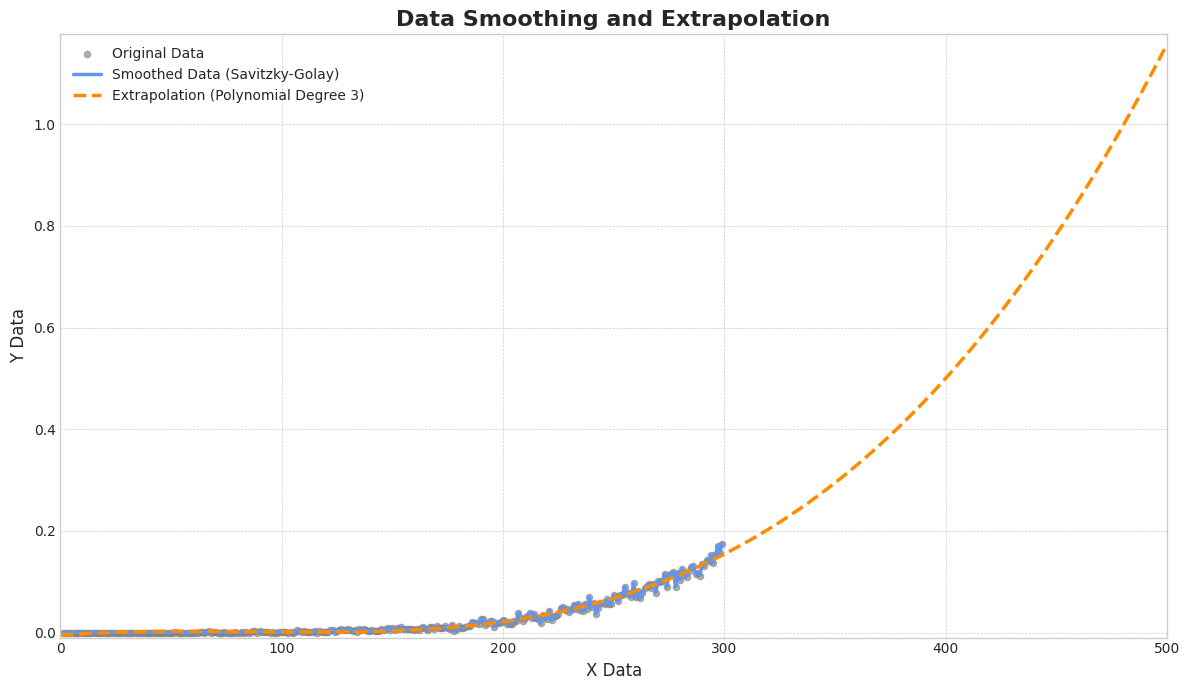

In [38]:
# --- Step 2: Extrapolate the data ---
# We will fit a polynomial to the *smoothed* data to capture the trend.
# A degree of 2 (quadratic) is often a good starting point.
degree = 3
coeffs = np.polyfit(x_data, y_5dp, degree)
poly_func = np.poly1d(coeffs)

# Define the range for extrapolation
# Let's extrapolate out to x = 400
x_extrapolate = np.arange(0, 501)
y_extrapolate = poly_func(x_extrapolate)

# --- Step 3: Plot the results ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Plot original data
ax.scatter(x_data, y_5dp, label='Original Data', color='gray', alpha=0.6, s=20)

# Plot smoothed data
ax.plot(x_data, y_5dp, label=f'Smoothed Data (Savitzky-Golay)', color='cornflowerblue', linewidth=2.5)

# Plot extrapolated data
ax.plot(x_extrapolate, y_extrapolate, label=f'Extrapolation (Polynomial Degree {degree})', color='darkorange', linestyle='--', linewidth=2.5)

# Formatting the plot
ax.set_title('Data Smoothing and Extrapolation', fontsize=16, fontweight='bold')
ax.set_xlabel('X Data', fontsize=12)
ax.set_ylabel('Y Data', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set plot limits for better visualization
ax.set_xlim(left=0, right=500)
ax.set_ylim(bottom=min(y_3dp) - 0.02, top=max(y_extrapolate) + 0.02)

plt.tight_layout()
plt.show()

In [35]:
def find_real(numbers):
    positive_reals = [c.real for c in numbers if c.imag == 0 and c.real > 0]
    return min(positive_reals)

In [36]:
mu_sens=find_real((poly_func_sens-0.9).roots)
print(f"sens at {mu_sens:.1f} events number")
print("")
mu_3dp=find_real((poly_func_3dp-0.5).roots)
print(f"3dp at {mu_3dp:.1f} events number")
print("")
mu_5dp=find_real((poly_func_5dp-0.5).roots)
print(f"5dp at {mu_5dp:.1f} events number")
print("")

sens at 95.6 events number

3dp at 215.5 events number

5dp at 400.0 events number

